# Laboratory 2

### Group R. Rotoloni Gabriele n°733421

#### The input dataset can be found in the `DatasetsLocation.md` file in the `Datasets` folder.

After indicating the input paths to the transformed datasets, it's possibile to run the notebook altogether and read the results.
This notebook uses the datasets that have been produced by the notebook in the Preproc folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing

In [2]:
inputPath = "<input_path>\\Contracts_dataset.csv"

In [3]:
contracts = pd.read_csv(inputPath)
contracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,2020-09-05,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,2019-12-07,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
2,2013-05-06,F,15-24,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIANO
3,2010-12-03,F,25-49,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIANO
4,2021-06-04,F,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...,...
12993406,2018-04-09,F,50-64,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
12993407,2018-12-10,F,50-64,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
12993408,2017-01-10,F,25-49,Servizi integrati di gestione agli edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIANO
12993409,2019-11-07,M,25-49,Installazione di impianti elettrici in edifici...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIANO


We make the DATA attribute become the index and transform it into a datetime type

In [4]:
contracts.DATA = pd.to_datetime(contracts.DATA)
#contracts.index = contracts.DATA
#contracts.drop(columns=['DATA'], inplace=True)
contracts.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,2020-09-05,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,2019-12-07,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
2,2013-05-06,F,15-24,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIANO
3,2010-12-03,F,25-49,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIANO
4,2021-06-04,F,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO


In the following codes I will do some statistical analysis on this data that I have not done in the previous Laboratory.

In [5]:
genereCount = contracts.GENERE.groupby(contracts.GENERE).count()
femaleCount = genereCount[0]
maleCount = genereCount[1]

contracts.GENERE.describe()

count     12993411
unique           2
top              M
freq       7043042
Name: GENERE, dtype: object

In [6]:
print("Percentage of males: ", maleCount/genereCount.sum())
print("Percentage of females: ", femaleCount/genereCount.sum())

Percentage of males:  0.5420471960749953
Percentage of females:  0.45795280392500476


In [7]:
contracts.ETA.describe()

count     12993411
unique           5
top          25-49
freq       8423078
Name: ETA, dtype: object

In [8]:
contracts.SETTOREECONOMICODETTAGLIO.describe()

count                              12993411
unique                                 1226
top       Ristorazione con somministrazione
freq                                 586195
Name: SETTOREECONOMICODETTAGLIO, dtype: object

In [9]:
contracts.TITOLOSTUDIO.describe()

count          12993411
unique               13
top       LICENZA MEDIA
freq            3704849
Name: TITOLOSTUDIO, dtype: object

In [10]:
contracts.CONTRATTO.describe()

count                       12993411
unique                            54
top       LAVORO A TEMPO DETERMINATO
freq                         7606158
Name: CONTRATTO, dtype: object

In [11]:
contracts.MODALITALAVORO.describe()

count        12993411
unique              5
top       TEMPO PIENO
freq          7496326
Name: MODALITALAVORO, dtype: object

In [12]:
contracts.PROVINCIAIMPRESA.describe()

count     12993411
unique          12
top         MILANO
freq       6068222
Name: PROVINCIAIMPRESA, dtype: object

In [13]:
citizienCount = contracts.CITTADINANZA.groupby(contracts.CITTADINANZA).count()
italianCount = citizienCount[0]
forCount = citizienCount[1]

contracts.CITTADINANZA.describe()

count     12993411
unique           2
top       ITALIANO
freq       9782131
Name: CITTADINANZA, dtype: object

In [14]:
print("Percentage of italians: ", italianCount/citizienCount.sum())
print("Percentage of foreigners: ", forCount/citizienCount.sum())

Percentage of italians:  0.7528531961314854
Percentage of foreigners:  0.2471468038685146


Some visualizations

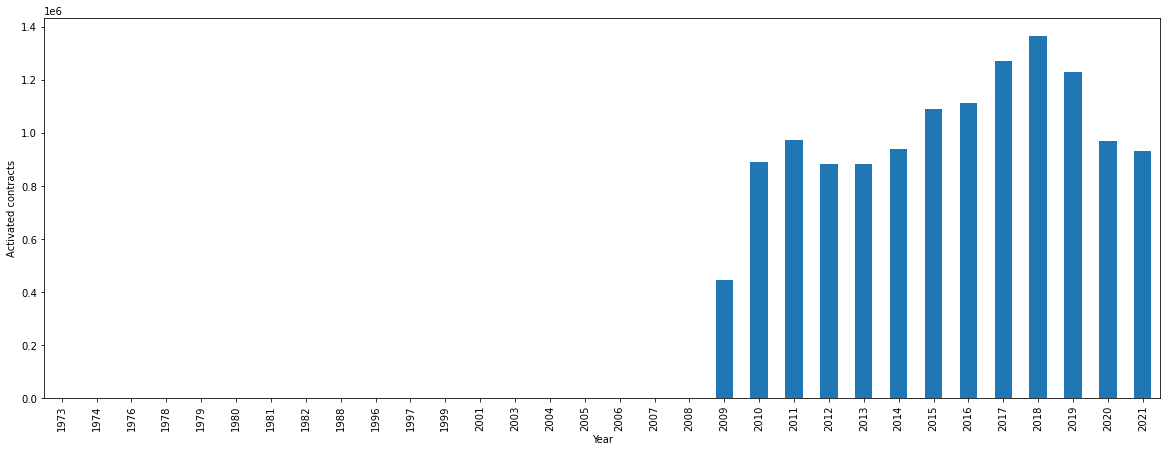

In [15]:
totalDates_activated = contracts.DATA.astype('datetime64[Y]')
totalDates_activated = totalDates_activated.groupby(totalDates_activated).count()
totalDates_activated.index = totalDates_activated.index.year

fig = plt.figure(figsize=(20, 7))

totalDates_activated.plot(kind="bar", ylabel='Activated contracts', xlabel='Year')

plt.show()

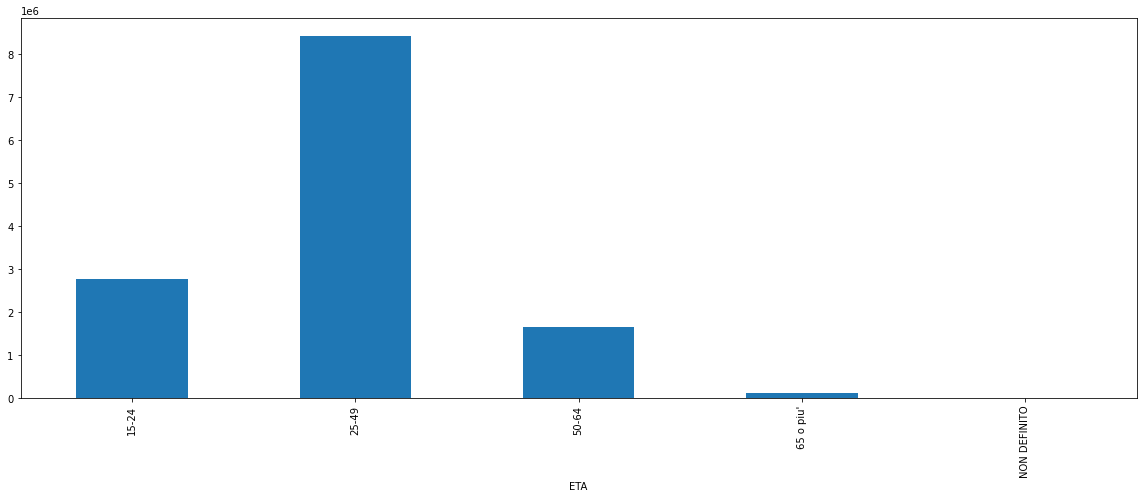

In [16]:
totalByAge = contracts.ETA.groupby(contracts.ETA).count()
fig = plt.figure(figsize=(20, 7))
totalByAge.plot(kind='bar', )
plt.show()

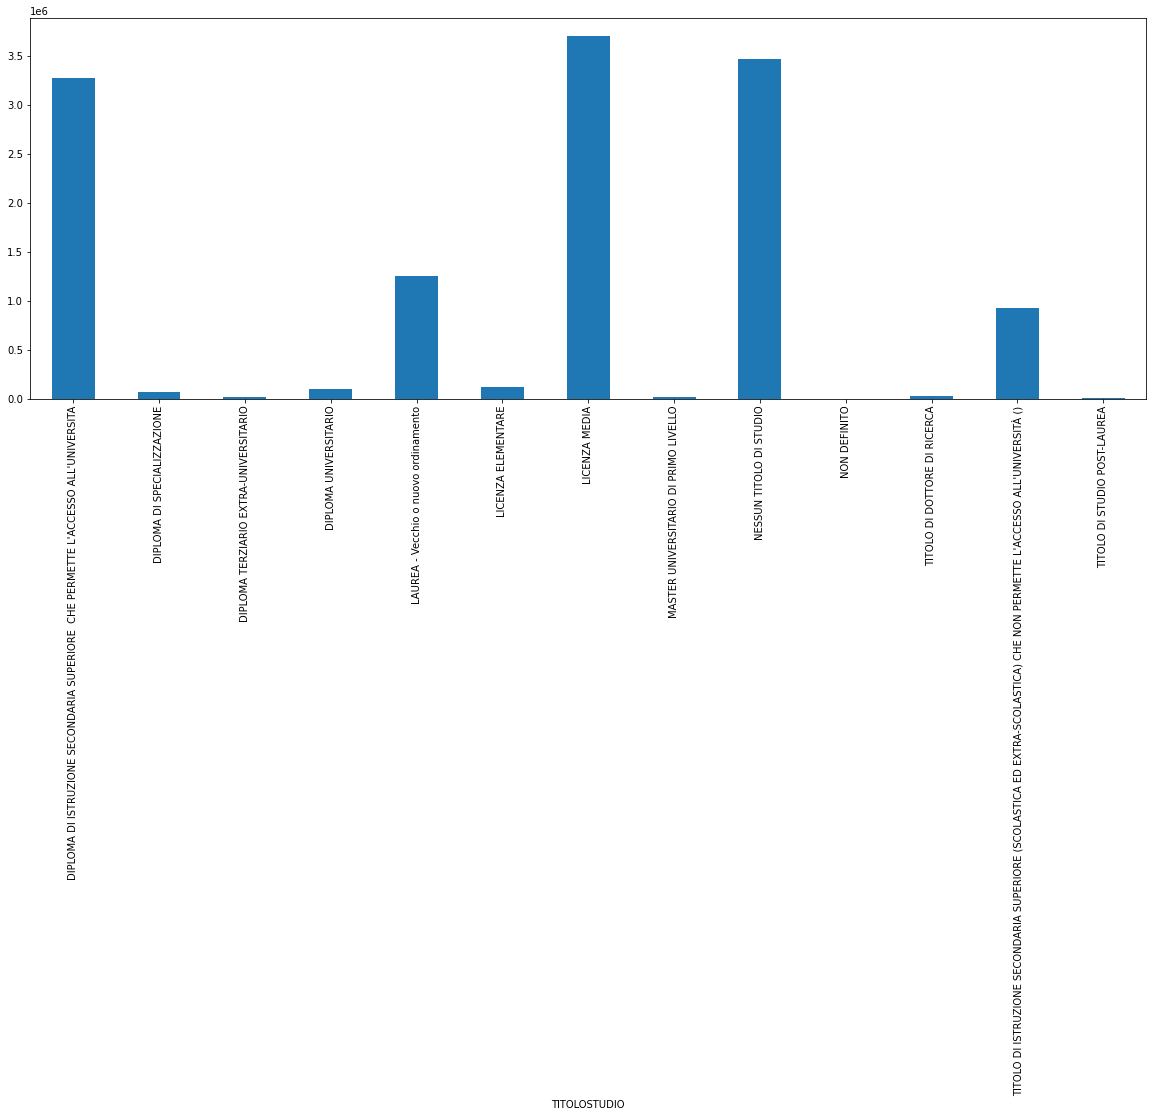

In [17]:
totalByEdu = contracts.TITOLOSTUDIO.groupby(contracts.TITOLOSTUDIO).count()
fig = plt.figure(figsize=(20, 7))
totalByEdu.plot(kind='bar', )
plt.show()

Some analysis on Time Series

Number of activated contracts per month

In [18]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

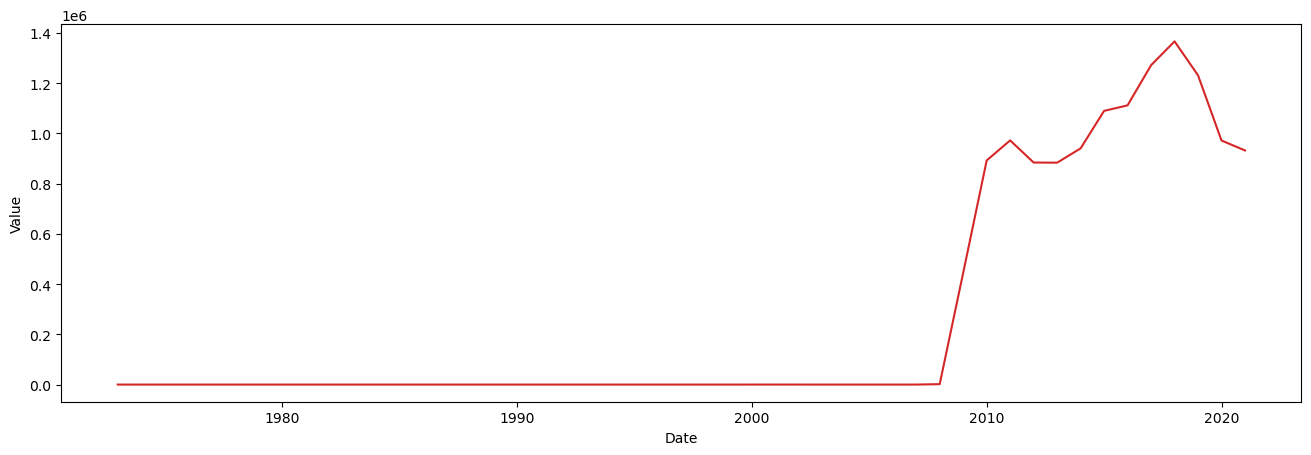

In [19]:
df = contracts.groupby(contracts.DATA.astype('datetime64[Y]')).count()

plot_df(df, x=df.DATA.index, y=df.DATA, title='')

In [20]:
print("Number of activated contracts registered before 2008: ",
      len(contracts.DATA[contracts.DATA < '2008-01-01']))
print("Number of activated contracts registered in 2008: ",
      len(contracts.DATA[(contracts.DATA > '2007-12-31') & (contracts.DATA < '2009-01-01')]))
print("Number of activated contracts registered in 2009: ",
      len(contracts.DATA[(contracts.DATA > '2008-12-31') & (contracts.DATA < '2010-01-01')]))

Number of activated contracts registered before 2008:  66
Number of activated contracts registered in 2008:  1596
Number of activated contracts registered in 2009:  445381


For this analysis we can start considering values after 2008 because the number of missing values is too high

In [21]:
originalLength = len(contracts)
contracts = contracts[contracts.DATA.between('2009-01-01','2021-12-31')]
print("Number of dropped rows: ",originalLength - len(contracts))

Number of dropped rows:  1662


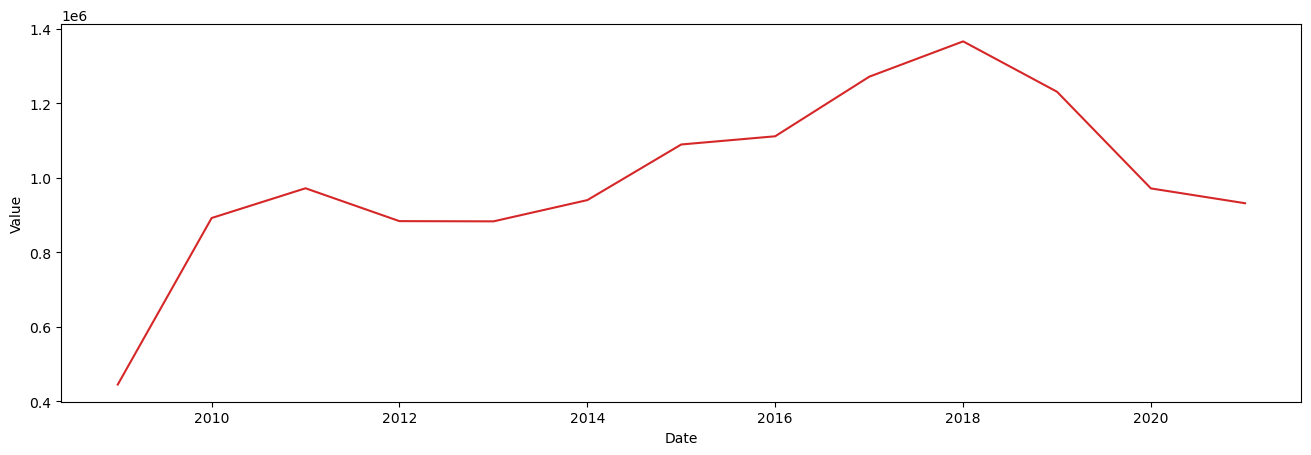

In [22]:
df = contracts.groupby(contracts.DATA.astype('datetime64[Y]')).count()
#df = df[(df.DATA.index > '2018-12-31') & (df.DATA.index < '2020-01-01')]

plot_df(df, x=df.DATA.index, y=df.DATA, title='')

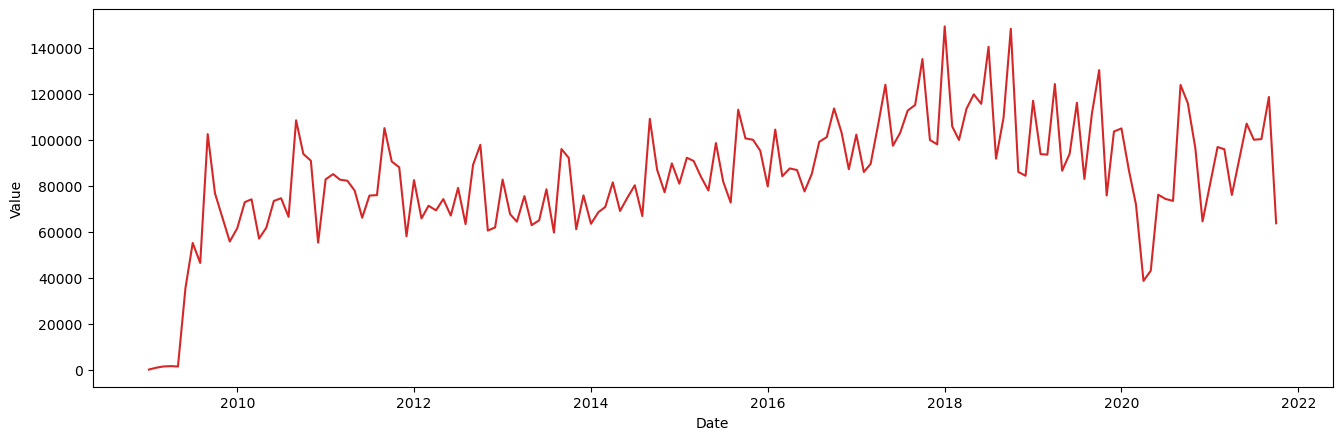

In [28]:
df = contracts.groupby(contracts.DATA.astype('datetime64[M]')).count()

plot_df(df, x=df.DATA.index, y=df.DATA, title='')

If we consider a single year we can see that there are some missing values during the month. This either means that there are missing values or that activation of contracts is not declared in the actual day it was activated.

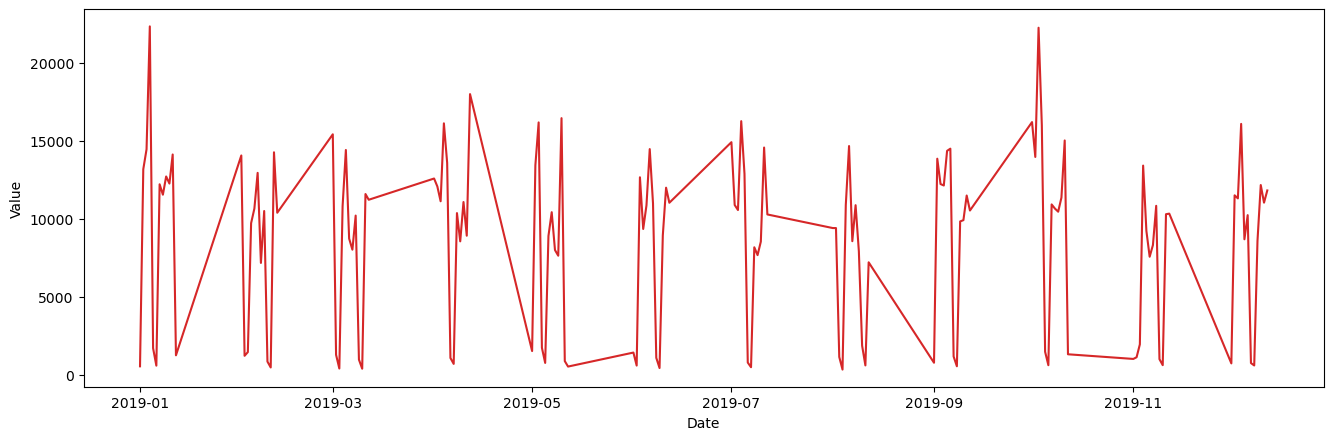

In [24]:
df = contracts.groupby(contracts.DATA.astype('datetime64[m]')).count()
df = df[(df.DATA.index > '2018-12-31') & (df.DATA.index < '2020-01-01')]

plot_df(df, x=df.DATA.index, y=df.DATA, title='')

Visualize monthly values